# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    city = city.replace(" ", "%20")
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [3]:
# cities_df = pd.read_csv("../output_data/cities.csv")
# cities_df = cities_df.set_index("City")
# cities_df

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
url= "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20'

In [50]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1 

print(f"Starting data retrieval: ")
print(f"-------------------------")

for city in cities: 
    
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        
        record = record + 1
        
    except: 
        print("City not found. Will attemp something else")
        
    continue 


Starting data retrieval: 
-------------------------
Processing Record 1 | Hobart
Processing Record 2 | Sobolevo
Processing Record 3 | Ancud
Processing Record 4 | Manacapuru
Processing Record 5 | Klaksvík
Processing Record 6 | Vaini
Processing Record 7 | Dunedin
Processing Record 8 | East London
Processing Record 9 | Weligama
Processing Record 10 | Busselton
Processing Record 11 | Souillac
Processing Record 12 | Hamilton
Processing Record 13 | Maningrida
Processing Record 14 | Vilhena
Processing Record 15 | Sungai Penuh
Processing Record 16 | Icod de los Vinos
Processing Record 17 | Bethel
Processing Record 18 | Saldanha
Processing Record 19 | Lorengau
Processing Record 20 | ‘Āhuimanu
Processing Record 21 | Half Moon Bay
Processing Record 22 | Berea
Processing Record 23 | Brownsville
Processing Record 24 | Ilesha
Processing Record 25 | Mar del Plata
Processing Record 26 | Nishihara
Processing Record 27 | Lodwar
Processing Record 28 | Punta Arenas
Processing Record 29 | Yeniseysk
Process

Processing Record 225 | Miles City
Processing Record 226 | Hobyo
Processing Record 227 | Alekseyevka
Processing Record 228 | Athabasca
Processing Record 229 | Tuatapere
Processing Record 230 | Necochea
Processing Record 231 | Tupik
Processing Record 232 | Glenwood Springs
Processing Record 233 | Chumikan
Processing Record 234 | Uruçuí
Processing Record 235 | Cockburn Town
Processing Record 236 | Pedernales
Processing Record 237 | Kaseda-shirakame
Processing Record 238 | San Miguel
Processing Record 239 | Kattivākkam
Processing Record 240 | Tra Vinh
Processing Record 241 | Mwense
Processing Record 242 | Laguna
City not found. Will attemp something else
Processing Record 243 | Alice Springs
Processing Record 244 | Perm
Processing Record 245 | Zhangye
Processing Record 246 | Dudinka
City not found. Will attemp something else
Processing Record 247 | Ilulissat
Processing Record 248 | Langham
Processing Record 249 | Yar-Sale
Processing Record 250 | Te Anau
Processing Record 251 | Nuuk
Proces

Processing Record 446 | Nantucket
Processing Record 447 | Staryy Nadym
Processing Record 448 | Westminster
Processing Record 449 | Isangel
Processing Record 450 | San Carlos
Processing Record 451 | Berbera
Processing Record 452 | Yanggu
Processing Record 453 | Alghero
Processing Record 454 | Bubanza Province
Processing Record 455 | Murray Bridge
Processing Record 456 | Andenes
Processing Record 457 | Vanavara
Processing Record 458 | Zaidpur
City not found. Will attemp something else
Processing Record 459 | Srednekolymsk
Processing Record 460 | Padang
Processing Record 461 | Concarneau
Processing Record 462 | Paraíso
Processing Record 463 | Port Macquarie
Processing Record 464 | Chake Chake
Processing Record 465 | Kemin
Processing Record 466 | Narasannapeta
Processing Record 467 | Orange Cove
Processing Record 468 | Armidale
Processing Record 469 | Kapuskasing
Processing Record 470 | Seoul
Processing Record 471 | Sargūr
City not found. Will attemp something else
Processing Record 472 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
weather = {
    "City": city_name,
    "Cloudiness":cloudiness,
    "Country": country,
    "Lat":lat,
    "Lang": lng,
    "Date":date,
    "Humidity":humidity,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed,
}

weather_df = pd.DataFrame(weather)

weather_df.count()

weather_df.to_csv('../output_data/weather_df.csv')

weather_df

,City,Cloudiness,Country,Lat,Lang,Date,Humidity,Max Temp,Wind Speed
0,Hobart,40,AU,-42.88,147.33,1587361864,44,59.00,25.28
1,Sobolevo,20,RU,54.43,31.90,1587361865,72,37.72,11.56
2,Ancud,58,CL,-41.87,-73.82,1587361866,100,44.60,1.12
3,Manacapuru,20,BR,-3.30,-60.62,1587361866,94,77.00,2.21
4,Klaksvík,0,FO,62.23,-6.59,1587361866,93,42.80,12.75
...,...,...,...,...,...,...,...,...,...
564,Lhokseumawe,16,ID,5.18,97.15,1587361725,60,89.85,7.83
565,Prabumulih,77,ID,-3.45,104.25,1587362019,58,89.80,2.95
566,Bestöbe,88,KZ,52.50,73.10,1587362019,33,68.38,4.81
567,Hokitika,59,NZ,-42.72,170.97,1587362019,71,52.65,0.74


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

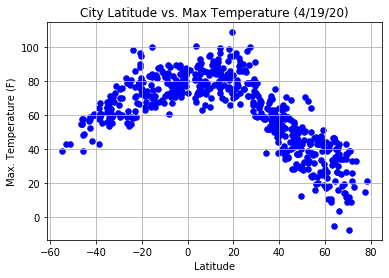

In [36]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"], marker="o", c = "blue", s=30)

plt.title("City Latitude vs. Max Temperature (4/19/20)")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../output_data/lattitude_vs_temp.png")
plt.show()

## Latitude vs. Humidity Plot

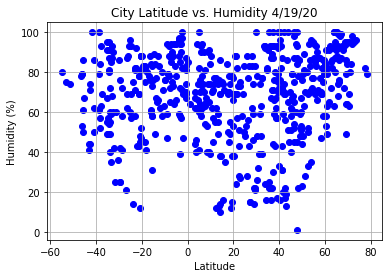

In [40]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker="o", c="blue", )


plt.grid()
plt.title(f"City Latitude vs. Humidity 4/19/20")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../output_data/lattitude_vs_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

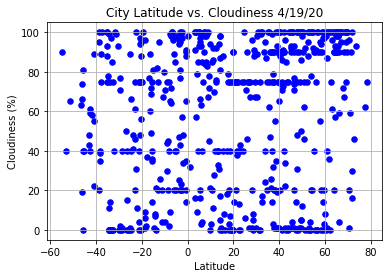

In [42]:
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'], marker="o", c="blue",s=30)

plt.grid()
plt.title(f"City Latitude vs. Cloudiness 4/19/20")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../output_data/lattitude_vs_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

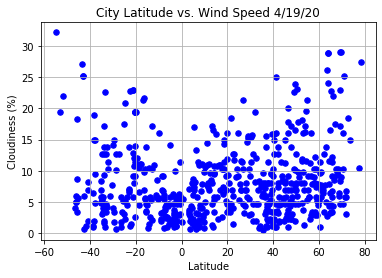

In [43]:
plt.scatter(weather_df['Lat'],weather_df['Wind Speed'], marker="o", c="blue",s=30)

plt.grid()
plt.title(f"City Latitude vs. Wind Speed 4/19/20")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../output_data/lattitude_vs_Windspeed.png")
plt.show()

## Linear Regression

In [72]:
# Create Northern and Southern Hemisphere DataFrames

Northern = weather_df.loc[weather_df["Lat"] >= 0.0]
Northern.reset_index(inplace=True)

Southern = weather_df.loc[weather_df["Lat"] <-0.0]
Southern.reset_index(inplace=True)

Northern

,index,City,Cloudiness,Country,Lat,Lang,Date,Humidity,Max Temp,Wind Speed
0,1,Sobolevo,20,RU,54.43,31.90,1587361865,72,37.72,11.56
1,4,Klaksvík,0,FO,62.23,-6.59,1587361866,93,42.80,12.75
2,8,Weligama,3,LK,5.97,80.42,1587361867,58,91.09,8.21
3,11,Hamilton,1,US,39.18,-84.53,1587361867,93,46.99,5.37
4,15,Icod de los Vinos,5,ES,28.37,-16.71,1587361868,74,66.00,7.00
...,...,...,...,...,...,...,...,...,...,...
374,561,San Francisco,75,US,37.77,-122.42,1587361989,66,55.99,8.05
375,562,Ajdabiya,100,LY,30.76,20.23,1587362018,32,71.11,15.70
376,564,Lhokseumawe,16,ID,5.18,97.15,1587361725,60,89.85,7.83
377,566,Bestöbe,88,KZ,52.50,73.10,1587362019,33,68.38,4.81


In [92]:
def plotRegression (x_values,y_values, x_dependence, y_dependence, position):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    print(f"R-squared value is: {rvalue}")
    line_eq = "y = " + str(round(slope,2))+ "x + " +str(round(intercept,2))
    

    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values, "r-")
    plt.annotate(line_eq,position,fontsize=12,color="red")
    plt.xlabel(x_dependence)
    plt.ylabel(y_dependence)
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R-squared value is: -0.8756194437333851


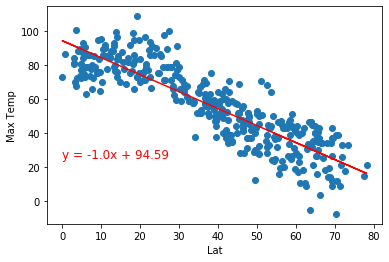

<Figure size 432x288 with 0 Axes>

In [123]:
x_dependence = "Lat"
y_dependence = "Max Temp"
position = (0,25)

plotRegression(Northern[x_dependence],Northern[y_dependence],x_dependence, y_dependence,position)
plt.savefig("../output_data/Northern_lattitude_vs_temp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R-squared value is: 0.7130070009081054


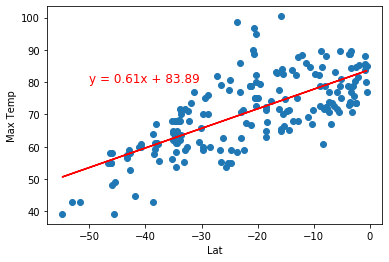

<Figure size 432x288 with 0 Axes>

In [124]:
x_dependence = "Lat"
y_dependence = "Max Temp"
position = (-50,80)

plotRegression(Southern[x_dependence],Southern[y_dependence],x_dependence,y_dependence,position)
plt.savefig("../output_data/Southern_lattitude_vs_temp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-squared value is: 0.2859470105260121


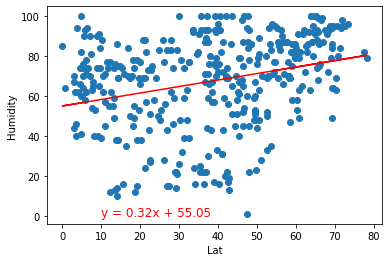

<Figure size 432x288 with 0 Axes>

In [125]:
x_dependence = "Lat"
y_dependence = "Humidity"
position = (10,0)

plotRegression(Northern[x_dependence],Northern[y_dependence],x_dependence,y_dependence,position)
plt.savefig("../output_data/Northern_lattitude_vs_humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-squared value is: 0.21521188789631984


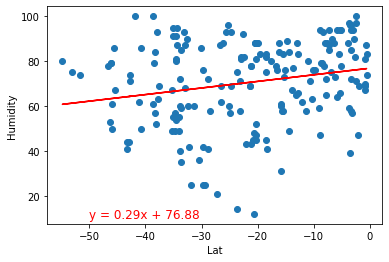

<Figure size 432x288 with 0 Axes>

In [126]:
x_dependence = "Lat"
y_dependence = "Humidity"
position = (-50,10)

plotRegression(Southern[x_dependence],Southern[y_dependence],x_dependence,y_dependence,position)
plt.savefig("../output_data/Southern_lattitude_vs_humidity.png")

#  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-squared value is: 0.12544182880261776


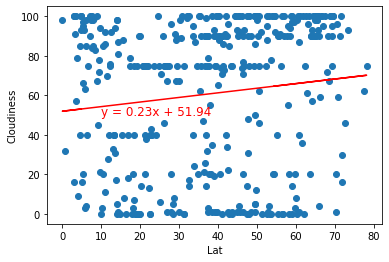

<Figure size 432x288 with 0 Axes>

In [127]:
x_dependence = "Lat"
y_dependence = "Cloudiness"
position = (10,50)

plotRegression(Northern[x_dependence],Northern[y_dependence],x_dependence,y_dependence,position)
plt.savefig("../output_data/Northern_lattitude_vs_cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-squared value is: 0.7130070009081054


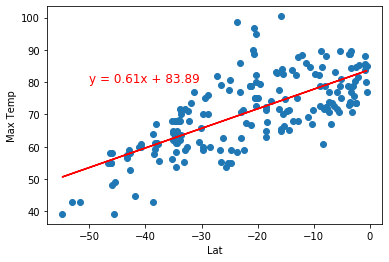

<Figure size 432x288 with 0 Axes>

In [128]:
x_dependence = "Lat"
y_dependence = "Max Temp"
position = (-50,80)

plotRegression(Southern[x_dependence],Southern[y_dependence],x_dependence,y_dependence,position)
plt.savefig("../output_data/Southern_lattitude_vs_cloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-squared value is: 0.25585038007706523


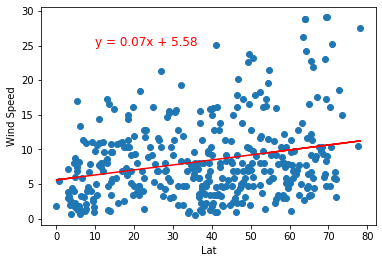

<Figure size 432x288 with 0 Axes>

In [129]:
x_dependence = "Lat"
y_dependence = "Wind Speed"
position = (10,25)

plotRegression(Northern[x_dependence],Northern[y_dependence],x_dependence,y_dependence,position)
plt.savefig("../output_data/Northern_lattitude_vs_windspeed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-squared value is: -0.2997238587008675


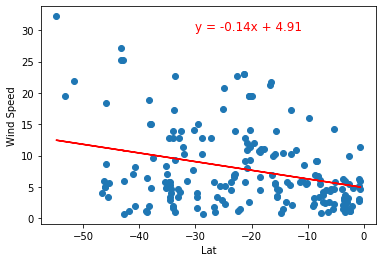

<Figure size 432x288 with 0 Axes>

In [130]:
x_dependence = "Lat"
y_dependence = "Wind Speed"
position = (-30,30)

plotRegression(Southern[x_dependence],Southern[y_dependence],x_dependence,y_dependence,position)
plt.savefig("../output_data/Southern_lattitude_vs_windspeed.png")